In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
placebo = [54, 51, 58, 44, 55, 52, 42, 47, 58, 46]
drug = [54, 73, 53, 70, 73, 68, 52, 65, 65]

In [3]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()

In [4]:
df1["effects"] = placebo

In [5]:
df1["label"] = "P"

In [6]:
df2["effects"] = drug
df2["label"] = "D"

In [7]:
df3 = pd.concat([df1,df2]).reset_index(drop=True)

#### df3 is our dataset with all placebo and drug data, as below 

In [8]:
df3.head()

,effects,label
0,54,P
1,51,P
2,58,P
3,44,P
4,55,P


In [9]:
df3.groupby("label").mean()

,effects
label,
D,63.666667
P,50.700000


In [10]:
means = df3.groupby("label").mean().values
means

array([[63.66666667],
       [50.7       ]])

In [11]:
diff_mean1 = means[0][0] - means[1][0]

### Mean of drug vs placebo

In [12]:
diff_mean1

12.966666666666661

In [13]:
diff_mean = np.zeros(10000, dtype = float)

In [14]:
for i in range(10000):
    df3["effects"]=np.random.permutation(df3.effects.values)
    means = df3.groupby("label").mean().values
    diff_mean[i] = means[0][0] - means[1][0]

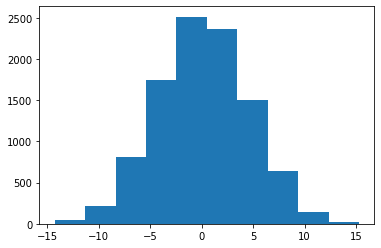

In [15]:
plt.hist(diff_mean)
#plt.axvline(x = 0, c='r',label ="zero")
plt.show()

### If we randomly shuffle labels, the mean advantage, over A LOT of simulations, will converge to 0
### Hence mean of 13, is unlikely from this simulation...hence it could not have come up randomly
### Therefore it is likely that the drug works.. 

#### -----------------------

### Now repeating same steps for artificial data -

In [16]:
placebo_art = np.array([56, 348, 162, 420, 440, 250, 389, 476, 288, 456])
drug_art = placebo_art + 13

In [17]:
df4 = pd.DataFrame()
df5 = pd.DataFrame()
df4["effects"] = placebo_art
df4["label"] = "P"
df5["effects"] = drug_art
df5["label"] = "D"
df6 = pd.concat([df4,df5]).reset_index(drop=True)
df6.head()
df6.groupby("label").mean()
means1 = df6.groupby("label").mean().values
means1
diff_mean2 = means1[0][0] - means1[1][0]

#### Difference of mean, between drug and placebo

In [18]:
diff_mean2

13.0

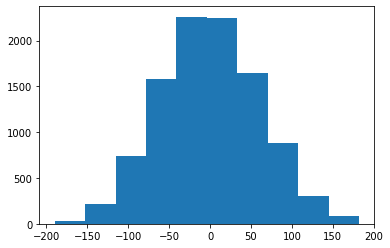

In [19]:
diff_mean3 = np.zeros(10000, dtype = float)

for i in range(10000):
    df6["effects"]=np.random.permutation(df6.effects.values)
    meansx = df6.groupby("label").mean().values
    diff_mean3[i] = meansx[0][0] - meansx[1][0]
    
plt.hist(diff_mean3)
#plt.axvline(x = 0, c='r',label ="zero")
plt.show()

#### In the above, our difference of mean of 13, is almost centered in the distribution of random data. Hence,it is likely our data was generated randomly and is not statistically significant, meaning we are not certain that the drug has an effect. The mean effect of +13 in our sample could have come by chance

#### ------------- Next part related to bootstrap ------------ 

In [20]:
placebo = [54, 51, 58, 44, 55, 52, 42, 47, 58, 46]
drug = [54, 73, 53, 70, 73, 68, 52, 65, 65]
mean_adv = np.zeros(10000)
for i in range(10000):
    boot_index_placebo = np.random.choice(placebo, size=len(placebo))
    boot_index_drug = np.random.choice(drug, size=len(drug))
    mean_adv[i] = boot_index_drug.mean() - boot_index_placebo.mean()

fiveperc = int(np.percentile(mean_adv, 5))
ninetyfiveperc = int(np.percentile(mean_adv, 95))
mean = int(mean_adv.mean())

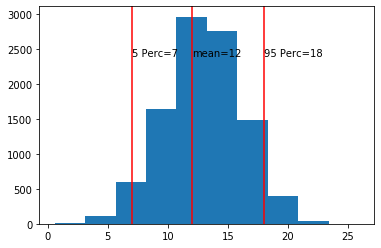

In [21]:
##### plt.hist(mean_adv)
plt.hist(mean_adv)
plt.axvline(x = fiveperc, c='r')
plt.axvline(x = ninetyfiveperc, c='r',label ="zero")
plt.axvline(x = mean, c='r',label ="zero")
plt.text(mean,2400, "mean={}".format(mean))
plt.text(fiveperc,2400, "5 Perc={}".format(fiveperc))
plt.text(ninetyfiveperc,2400, "95 Perc={}".format(ninetyfiveperc))
plt.show()

### 0 is not in the graph, hence drug definitely has some benefit over placebo in most simulations
### the mean advantage of drug over placebo varies between 7 and 18 ----> (5pcentile, 95pcentile)
### so the drug has an effect of 7 to 18 units over placebo, with mean being 13 units